Chessboard corners detected in calibration_images\captured_image1.jpg
Chessboard corners detected in calibration_images\captured_image10.jpg
Chessboard corners detected in calibration_images\captured_image11.jpg
Chessboard corners detected in calibration_images\captured_image12.jpg
Chessboard corners detected in calibration_images\captured_image14.jpg
Chessboard corners detected in calibration_images\captured_image15.jpg
Chessboard corners detected in calibration_images\captured_image17.jpg
Chessboard corners detected in calibration_images\captured_image18.jpg
Chessboard corners detected in calibration_images\captured_image19.jpg
Chessboard corners detected in calibration_images\captured_image2.jpg
Chessboard corners detected in calibration_images\captured_image20.jpg
Chessboard corners detected in calibration_images\captured_image21.jpg
Chessboard corners detected in calibration_images\captured_image23.jpg
Chessboard corners detected in calibration_images\captured_image24.jpg
Chessboa

(np.float64(-0.5), np.float64(1279.5), np.float64(719.5), np.float64(-0.5))

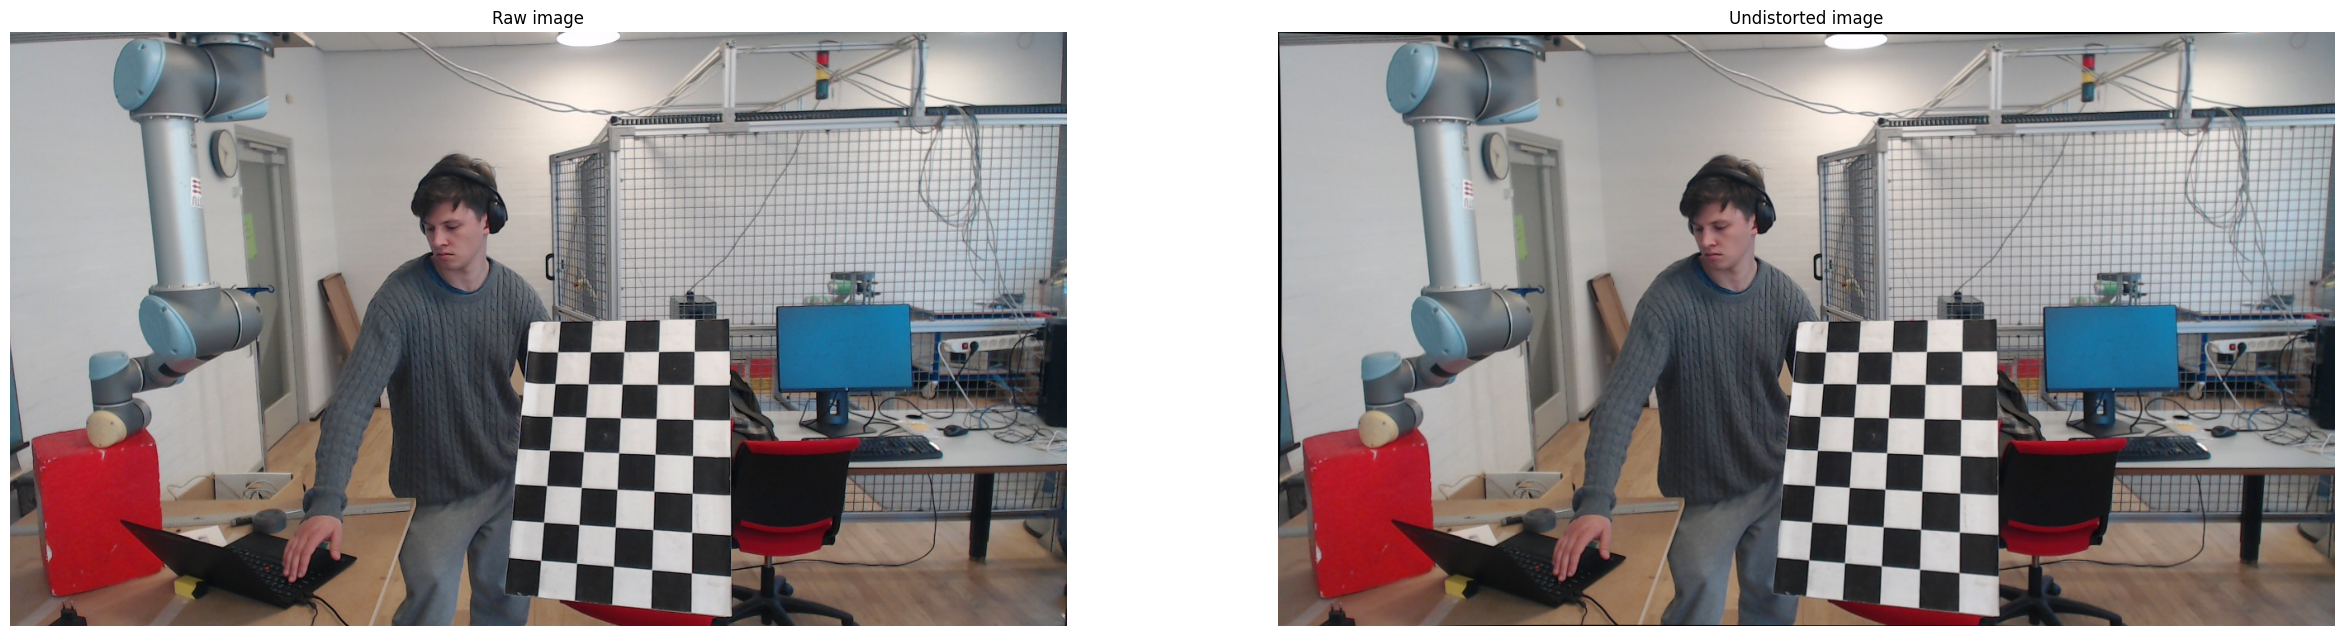

In [5]:
import cv2 as cv
import numpy as np
import glob
from matplotlib import pyplot as plt



#======================= CHESSBOARD PARAMETERS =======================#
chessboard_size = (5, 7)
square_size = 80

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

#======================= CHESSBOARD COORDINATES =======================#
chessboard_coords = np.zeros((chessboard_size[0] * chessboard_size[1], 3), np.float32)

# Set the X and Y coordinates of the object points (Z remains 0)
chessboard_coords[:, :2] = np.mgrid[0:chessboard_size[0], 0:chessboard_size[1]].T.reshape(-1, 2)

obj_points = []  # 3D points in real world space
img_points = []  # 2D points in image plane

calib_images = glob.glob('calibration_images/captured_image*.jpg')

for image in calib_images:
    img = cv.imread(image)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    kernel_number = 1
    sides = -0.25*(kernel_number+1) + 0.25
    kernel = np.array([[0, sides, 0],
                       [sides, kernel_number,sides],
                       [0, sides, 0]])
    gray = cv.filter2D(gray, -1, kernel)

    gray = cv.equalizeHist(gray)

        
    ret, corners = cv.findChessboardCorners(gray, chessboard_size, None)
        
    if ret:
        # Add object points (3D) and image points (2D) after detecting corners
        corners = cv.cornerSubPix(gray, corners, (5,5), (-1,-1), criteria)
        obj_points.append(chessboard_coords)
        img_points.append(corners)
            
        # Draw and display the corners on the chessboard image
        cv.drawChessboardCorners(img, chessboard_size, corners, ret)
        #cv.imshow('Chessboard', img)
        print(f"Chessboard corners detected in {image}")
        cv.waitKey(1)
    else:
        print(f"Chessboard corners not detected in {image}")
        cv.waitKey(10)
        
            
cv.destroyAllWindows()


ret, camera_matrix, dist_coeffs, rvecs, tvecs = cv.calibrateCamera(obj_points, img_points, gray.shape[::-1], None, None)

test_img = cv.imread("calibration_images/captured_image1.jpg")

undistorted_img = cv.undistort(test_img, camera_matrix, dist_coeffs)

    
with open('calib_param.txt', 'w') as file:
    file.write("===============CAMERA MATRIX===============\n")
    file.write(np.array2string(camera_matrix) + '\n')
    file.write("===============DISTANCE COEFFICIENTS===============\n")
    file.write(np.array2string(dist_coeffs) + '\n')
    file.write("===============ROTATION VECTORS===============\n")
    file.write(np.array2string(np.array(rvecs)) + '\n')
    file.write("===============TRANSLATION VECTORS===============\n")
    file.write(np.array2string(np.array(tvecs)) + '\n')
    
# Plot side by side

img1 = cv.cvtColor(test_img, cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(undistorted_img, cv.COLOR_BGR2RGB)

plt.figure(figsize=(30,15))

plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title("Raw image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title("Undistorted image")
plt.axis('off')
